In [75]:
#load all libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [76]:
df=pd.read_csv("lending_club_loan_dataset.csv")

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  float64
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

C:\Users\HPW\AppData\Local\Temp\ipykernel_16188\1764945758.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmin=1,vmax=1,annot=True)


<Axes: >

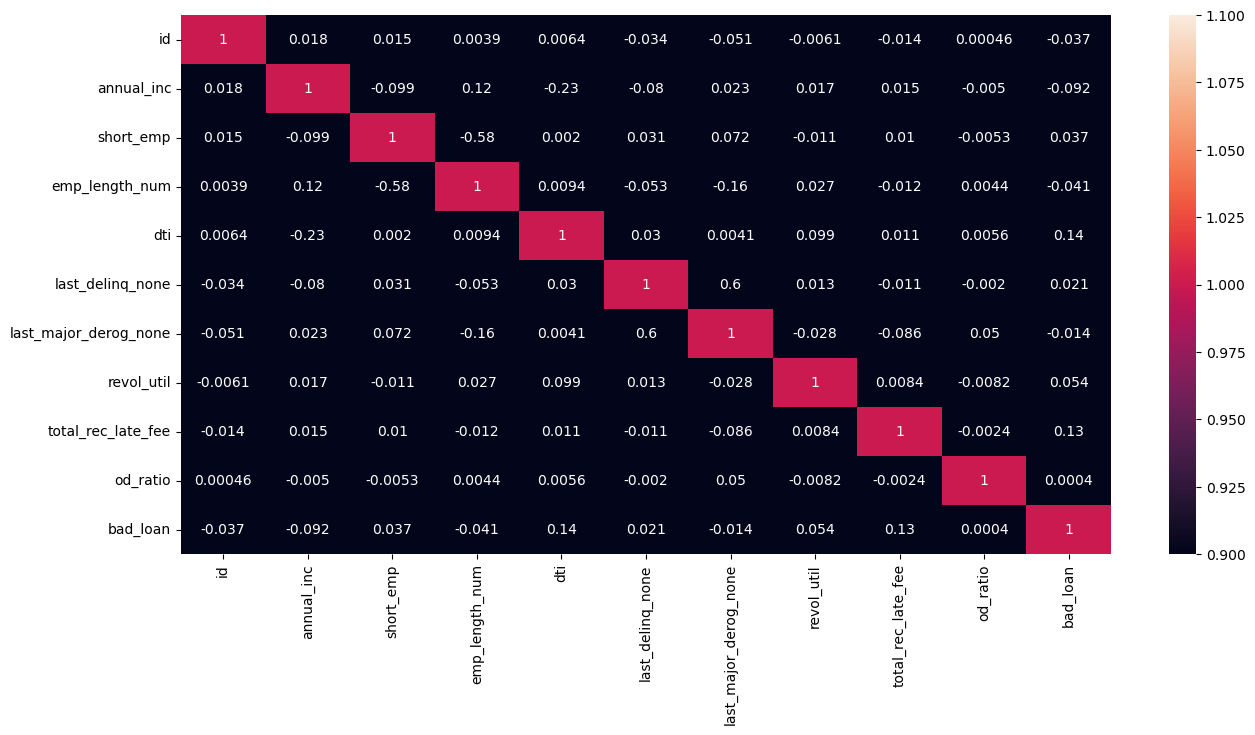

In [78]:
#checking correlation of each column with other
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),vmin=1,vmax=1,annot=True)

In [79]:
#checking balanced or imbalanced dataset
df["bad_loan"].value_counts()

0    16000
1     4000
Name: bad_loan, dtype: int64

<Axes: xlabel='bad_loan', ylabel='bad_loan'>

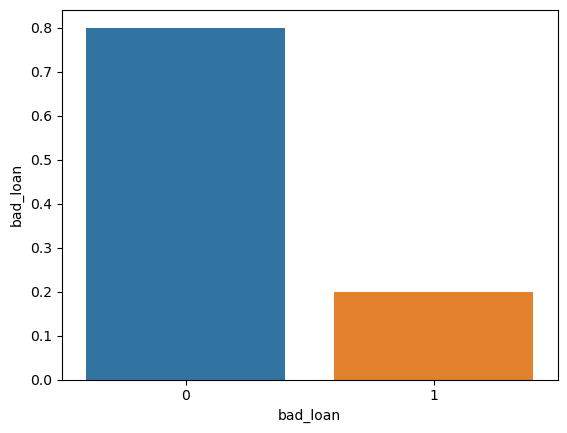

In [80]:
sns.barplot(x="bad_loan",y="bad_loan",data=df,estimator=lambda x:len(x)/len(df))

In [81]:
df["short_emp"].value_counts()

0    17750
1     2250
Name: short_emp, dtype: int64

<Axes: xlabel='short_emp', ylabel='count'>

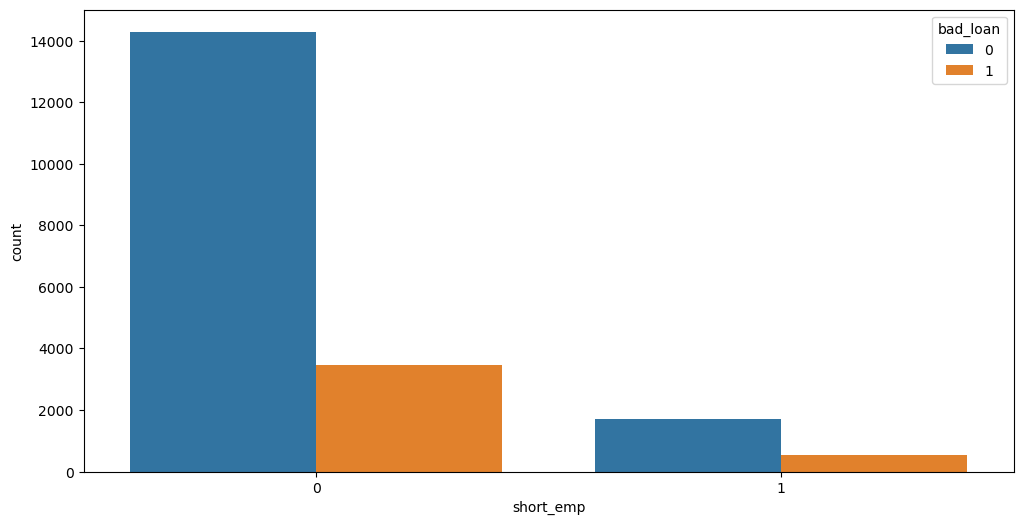

In [82]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'short_emp', hue = 'bad_loan', data = df)

<Axes: xlabel='term', ylabel='count'>

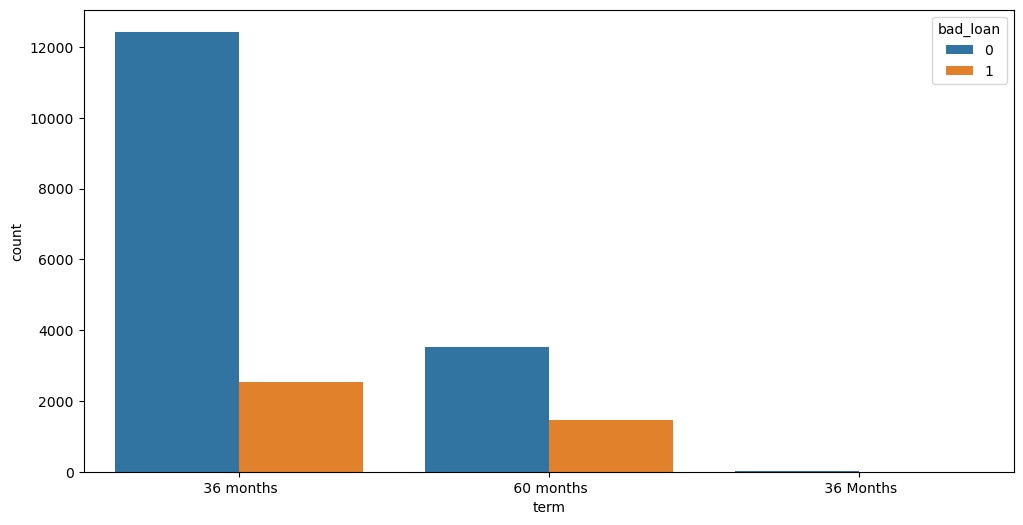

In [83]:
# Next feature Terms
plt.figure(figsize = (12,6))
sns.countplot(x = 'term', hue = 'bad_loan', data = df)

<Axes: xlabel='bad_loan', ylabel='annual_inc'>

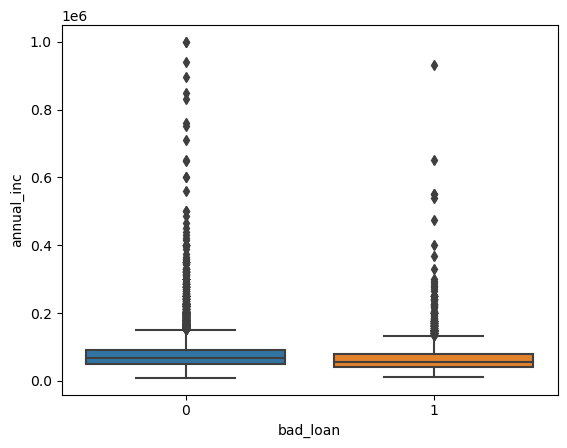

In [84]:
#Checking relationship or outliers detection of different features
sns.boxplot(x="bad_loan",y="annual_inc",data=df)

<Axes: xlabel='bad_loan', ylabel='od_ratio'>

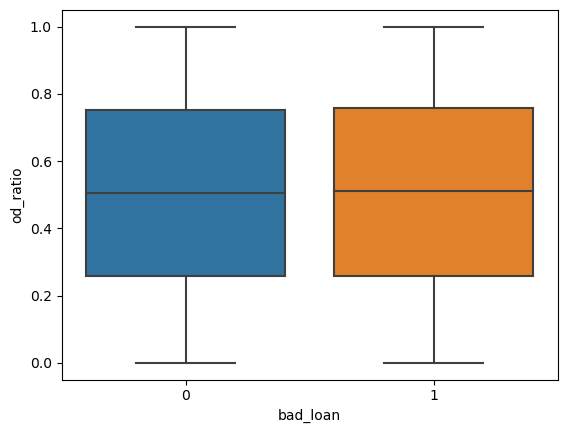

In [85]:
sns.boxplot(x="bad_loan",y="od_ratio",data=df)

#### home_ownership and dti have some null values
#### Last_major_derog_none have large amount of null values  


In [86]:
# droping of last_major_derog_none column because this have large null values
df.drop(['last_major_derog_none'], axis = 1, inplace = True)

#### short_emp and emp_length_num have similar type of values so combining two feature and droping one feature

In [87]:
# considering every employee length less than or equal to one year as one
df.loc[df["emp_length_num"] == 0, "emp_length_num"] = 1

In [88]:
# droping short_emp
df.drop(['short_emp'], axis = 1, inplace = True)

In [89]:
# lowercase converting Term feature
df['term'] = df['term'].apply(lambda i : i.lower())

In [90]:
# There is messy value in term feature.Two same values with different attribute name 36 Months and 36 months
df.loc[df["term"]=="36 Months", "term"]= "36 months"

#### Filling Remaining two columns null values with appropriate method i.e. mean,mode.

In [91]:
# home_ownership consist of categorical value i.e. own,mortage,rent.
# By mode filling that values.
df['home_ownership'] = df['home_ownership'].fillna(df['home_ownership'].mode()[0])

In [92]:
# dti consist of numerical value.
# By mean filling that values.
df['dti'] = df['dti'].fillna(df['dti'].mean())

In [93]:
df

,id,grade,annual_inc,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,RENT,26.27,credit_card,36 months,1,43.2,0.0,0.160624,0
1,9604874,A,83000.0,4,OWN,5.39,credit_card,36 months,0,21.5,0.0,0.810777,0
2,9684700,D,78000.0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,46.3,0.0,0.035147,1
3,9695736,D,37536.0,6,MORTGAGE,12.28,medical,60 months,0,10.7,0.0,0.534887,1
4,9795013,D,65000.0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,15.2,0.0,0.166500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6595657,B,27000.0,9,RENT,18.36,debt_consolidation,36 months,1,46.5,0.0,0.821782,1
19996,1576331,B,45000.0,2,MORTGAGE,23.22,major_purchase,36 months,0,46.2,0.0,0.652200,0
19997,6645736,B,104000.0,5,MORTGAGE,13.27,debt_consolidation,36 months,1,78.5,0.0,0.482555,0
19998,6625736,A,38400.0,2,MORTGAGE,12.84,debt_consolidation,36 months,0,47.4,0.0,0.822980,0


### Model preparation

#### Encoding:-

In [94]:
#Encoding Categorical Columns by using LabelEncoder.
label_mappings = {}
cols_to_encode = ['grade', 'home_ownership', 'purpose', 'term']
encoder = LabelEncoder()
for col in cols_to_encode:
    df[col] = encoder.fit_transform(df[col])
    label_mappings[col] = {label: category for category, label in zip(encoder.classes_, encoder.transform(encoder.classes_))}


# Display label mappings for each column
for col, mappings in label_mappings.items():
    print(f"Column: {col}")
    for label, category in mappings.items():
        print(f"Label: {label} --> Category: {category}")

Column: grade
Label: 0 --> Category: A
Label: 1 --> Category: B
Label: 2 --> Category: C
Label: 3 --> Category: D
Label: 4 --> Category: E
Label: 5 --> Category: F
Label: 6 --> Category: G
Column: home_ownership
Label: 0 --> Category: MORTGAGE
Label: 1 --> Category: OWN
Label: 2 --> Category: RENT
Column: purpose
Label: 0 --> Category: car
Label: 1 --> Category: credit_card
Label: 2 --> Category: debt_consolidation
Label: 3 --> Category: home_improvement
Label: 4 --> Category: house
Label: 5 --> Category: major_purchase
Label: 6 --> Category: medical
Label: 7 --> Category: moving
Label: 8 --> Category: other
Label: 9 --> Category: small_business
Label: 10 --> Category: vacation
Label: 11 --> Category: wedding
Column: term
Label: 0 --> Category:  36 months
Label: 1 --> Category:  60 months


In [74]:
df

,id,grade,annual_inc,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,0,100000.0,1,2,26.27,1,0,1,43.2,0.0,0.160624,0
1,9604874,0,83000.0,4,1,5.39,1,0,0,21.5,0.0,0.810777,0
2,9684700,3,78000.0,11,0,18.45,2,1,1,46.3,0.0,0.035147,1
3,9695736,3,37536.0,6,0,12.28,6,1,0,10.7,0.0,0.534887,1
4,9795013,3,65000.0,11,0,11.26,2,0,0,15.2,0.0,0.166500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6595657,1,27000.0,9,2,18.36,2,0,1,46.5,0.0,0.821782,1
19996,1576331,1,45000.0,2,0,23.22,5,0,0,46.2,0.0,0.652200,0
19997,6645736,1,104000.0,5,0,13.27,2,0,1,78.5,0.0,0.482555,0
19998,6625736,0,38400.0,2,0,12.84,2,0,0,47.4,0.0,0.822980,0


#### Feature Scaling:-

In [95]:
#Initialize StandardScaler
standard_scaler = StandardScaler()

#Features to standardize
feature_cols = ['annual_inc', 'emp_length_num','total_rec_late_fee','dti','revol_util', 'od_ratio']

# Standardize the features
transformed_features = standard_scaler.fit_transform(df[feature_cols])

#Replace original features with standardized ones
df[feature_cols]=transformed_features

In [96]:
#selecting feature columns
feature_cols  = df.columns.tolist()

#selecting only input columns
feature_cols = [i for i in feature_cols if i not in ['id', 'bad_loan']]

#creating x and y as input and output
x_sample=df[feature_cols]
y_sample=df['bad_loan']

#### Balancing Dataset

In [97]:
# imblearn smote for balancing dataset
from imblearn.over_sampling import RandomOverSampler

In [98]:
#Initialize RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='majority')
oversample = RandomOverSampler(sampling_strategy=1)
#Fit sample value
x_resampled, y_resampled = oversample.fit_resample(x_sample, y_sample)
y_resampled.value_counts()

0    16000
1    16000
Name: bad_loan, dtype: int64

In [99]:
#spliting datset into training and testing in 70:30 ratio.
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.3, random_state = 1234)

In [100]:
#Using Logistic Regression Model
logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(x_train, y_train)

# Predict label for the test data and print classification report and confusion matrix
prediction_values_lr = logistic_regression_classifier.predict(x_test)
print(metrics.classification_report(y_test, prediction_values_lr, digits = 2))
print(metrics.confusion_matrix(y_test, prediction_values_lr))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66      4768
           1       0.67      0.63      0.65      4832

    accuracy                           0.66      9600
   macro avg       0.66      0.66      0.65      9600
weighted avg       0.66      0.66      0.65      9600

[[3258 1510]
 [1802 3030]]


In [101]:
#Using SVM Model
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)

# Predict label for the test data and print classification report and confusion matrix
prediction_values_svm = svm_classifier.predict(x_test)
print(metrics.classification_report(y_test, prediction_values_svm, digits = 2))
print(metrics.confusion_matrix(y_test, prediction_values_svm))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65      4768
           1       0.66      0.67      0.67      4832

    accuracy                           0.66      9600
   macro avg       0.66      0.66      0.66      9600
weighted avg       0.66      0.66      0.66      9600

[[3079 1689]
 [1581 3251]]


In [102]:
# Initialize Random Forest Model
random_forest = RandomForestClassifier(n_estimators = 1000, max_depth = 3, random_state = 1234)
random_forest.fit(x_train, y_train)

# Predict label for the test data and print classification report and confusion matrix
prediction_values_rf = random_forest.predict(x_test)
print(metrics.classification_report(y_test, prediction_values_rf, digits = 2))
print(metrics.confusion_matrix(y_test, prediction_values_rf))

              precision    recall  f1-score   support

           0       0.66      0.60      0.63      4768
           1       0.64      0.70      0.67      4832

    accuracy                           0.65      9600
   macro avg       0.65      0.65      0.65      9600
weighted avg       0.65      0.65      0.65      9600

[[2883 1885]
 [1460 3372]]


In [103]:
# Initialize XGBoost Model
xgboost_classifier = XGBClassifier(n_estimators = 5000, max_depth = 4, random_state = 1234, learning_rate = 0.3)
xgboost_classifier.fit(x_train, y_train)

# Predict label for the test data and print classification report and confusion matrix
prediction_values_xgboost = xgboost_classifier.predict(x_test)
print(metrics.classification_report(y_test, prediction_values_xgboost, digits = 2))
print(metrics.confusion_matrix(y_test, prediction_values_xgboost))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      4768
           1       0.84      0.96      0.90      4832

    accuracy                           0.89      9600
   macro avg       0.90      0.89      0.89      9600
weighted avg       0.90      0.89      0.89      9600

[[3910  858]
 [ 213 4619]]


In [104]:
import pickle

In [105]:
pickle.dump(xgboost_classifier,open("xg.pkl","wb"))

In [106]:
pickle.dump(standard_scaler,open("scaler.pkl","wb"))